In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [20]:
data = loadmat('ex3data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [21]:
weights = loadmat('ex3weights.mat')
weights.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [22]:
y = data['y']
# Add constant for intercept
X = np.c_[np.ones((data['X'].shape[0], 1)), data['X']]
print('X: {} (with intercept)'.format(X.shape))
print('y: {}'.format(y.shape))

X: (5000, 401) (with intercept)
y: (5000, 1)


In [23]:
theta1, theta2 = weights['Theta1'], weights['Theta2']
print('theta1: {}'.format(theta1.shape))
print('theta2: {}'.format(theta2.shape))

theta1: (25, 401)
theta2: (10, 26)


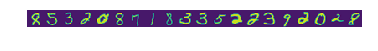

In [24]:
sample = np.random.choice(X.shape[0], 20)
plt.imshow(X[sample,1:].reshape(-1,20).T)
plt.axis('off');

In [25]:
def sigmoid(z):
    return(1/(1 + np.exp(-z)))

In [26]:
def lrcostFunctionReg(theta, reg, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = -1*(1/m)*(np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

In [27]:
def lrgradientReg(theta, reg, X, y):
    #here reg is synonymous to lambda in the regularised formula
    m = y.size
   # print(theta.shape())
    h = sigmoid(X.dot(theta.reshape(-1, 1)))
    #print(theta.shape())
    grad = (1/m)*X.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

In [28]:
from scipy.optimize import minimize

def oneVsAll(features, classes, n_labels, reg):
    initial_theta = np.zeros((X.shape[1], 1)) # 401*1
    all_theta = np.zeros((n_labels, X.shape[1])) #10*401
    
    for c in np.arange(1, n_labels+1):
        res = minimize(lrcostFunctionReg, initial_theta, args=(reg, features, (classes == c)*1), method=None,
                       jac=lrgradientReg, options={'maxiter':50})
        all_theta[c-1] = res.x
    return(all_theta)

In [30]:
theta = oneVsAll(X, y, 10, 0.1)
theta

array([[-2.39142338e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.90403614e-04,  1.25548916e-07,  0.00000000e+00],
       [-3.01137869e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.48908371e-03, -1.69495224e-04,  0.00000000e+00],
       [-4.51398334e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.60669585e-05,  3.43368479e-07,  0.00000000e+00],
       ...,
       [-8.41428002e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.96539602e-05,  6.26414118e-06,  0.00000000e+00],
       [-5.13253825e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.54282889e-04,  5.92217956e-06,  0.00000000e+00],
       [-4.38685169e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.60354278e-04,  9.53842298e-06,  0.00000000e+00]])

In [33]:
def predictOneVsAll(all_theta, features):
    probs = sigmoid(X.dot(all_theta.T))
    
    return(np.argmax(probs, axis=1)+1)
    

In [34]:
pred = predictOneVsAll(theta, X)
print('Training set accuracy: {} %'.format(np.mean(pred == y.ravel())*100))

Training set accuracy: 93.24 %
